# Programming Excercise 6: Support Vector Machines

## 1 Support Vector Machines
Use svms with 2D datasets to gain intuition of how SVMs work and how to use Guassian kernel with SVMs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sklearn.svm
%matplotlib inline

In [2]:
data=scipy.io.loadmat('hws\machine-learning-ex6\ex6\ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X=data['X']
y=data['y']
positive=X[(y==1).flatten()] #get occurances of X where y=1
negative=X[(y==0).flatten()] #get occurances of X where y=0

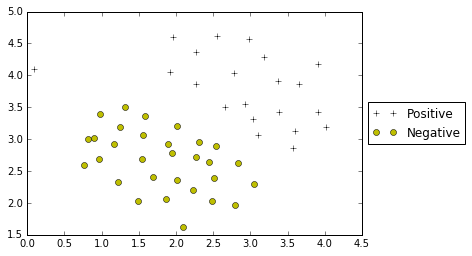

In [4]:
def plot_data():
    plt.plot(positive[:,0],positive[:,1],'k+',label='Positive')
    plt.plot(negative[:,0],negative[:,1],'yo',label='Negative')
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plot_data()

In [5]:
lin_svm=sklearn.svm.SVC(C=1,kernel='linear')
lin_svm.fit(X,y.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

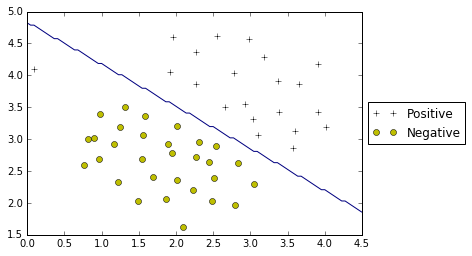

In [6]:
def plot_boundary(x_min,x_max,y_min,y_max,svm):
    x_axis=np.linspace(x_min,x_max,100)
    y_axis=np.linspace(y_min,y_max,100)
    decision_boundary=np.empty((len(x_axis),len(y_axis)))
    for i in range(len(x_axis)):
        for j in range(len(y_axis)):
            decision_boundary[i,j]=float(svm.predict(np.array([x_axis[i],y_axis[j]]).reshape(1,-1)))
    decision_boundary=decision_boundary.T
    plt.contour(x_axis,y_axis,decision_boundary,[0])
plot_boundary(0,4.5,1.5,5,lin_svm)
plot_data()

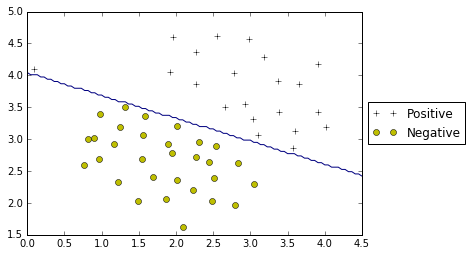

In [7]:
lin_svm=sklearn.svm.SVC(C=100,kernel='linear')
lin_svm.fit(X,y.flatten())
plot_boundary(0,4.5,1.5,5,lin_svm)
plot_data()

## 1.2 SVM with Gaussian Kernels
Implement Guassian Kernel

In [8]:
x1=np.array([1,2,1])
x2=np.array([0,4,-1])
sigma=2

In [9]:
def gaussianKernel(x1,x2,sigma):
    norm=np.dot((x1-x2).T,x1-x2)
    return np.exp(-norm/(2*sigma**2))
gaussianKernel(x1,x2,sigma)

0.32465246735834974

Load new data. Need guassian kernel as data is non linear

In [39]:
data2=scipy.io.loadmat('hws\machine-learning-ex6\ex6\ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

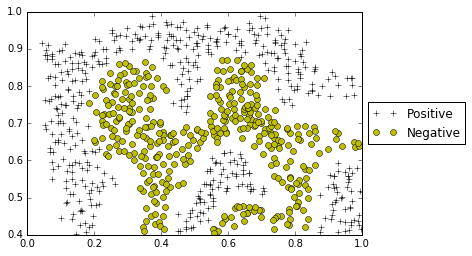

In [40]:
X=data2['X']
y=data2['y']
positive=X[(y==1).flatten()] #get occurances of X where y=1
negative=X[(y==0).flatten()] #get occurances of X where y=0
plot_data()

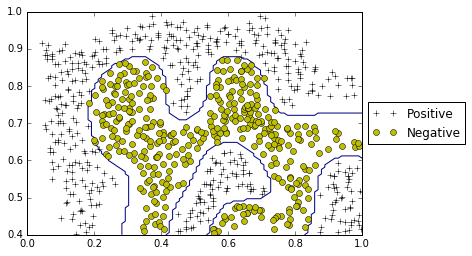

In [43]:
C=1
sigma=.1
gamma=sigma**-2
gauss_svm=sklearn.svm.SVC(C=C,kernel='rbf',gamma=gamma)
gauss_svm.fit(X,y.flatten())
plot_boundary(0,1,.4,1,gauss_svm)
plot_data()

What if we wanted to optimize C and sigma for a set of data?

In [45]:
data3=scipy.io.loadmat('hws\machine-learning-ex6\ex6\ex6data3.mat')
data3.keys()

dict_keys(['__version__', 'yval', 'X', 'y', '__header__', 'Xval', '__globals__'])

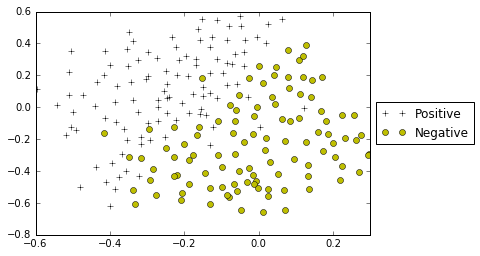

In [46]:
X=data3['X']
y=data3['y']
Xval=data3['Xval']
yval=data3['yval']
positive=X[(y==1).flatten()] #get occurances of X where y=1
negative=X[(y==0).flatten()] #get occurances of X where y=0
plot_data()

In [75]:
def gamma_search(X,y,Xval,yval):
    pair=(0,0) #initiate and store pair of values
    score=0 #start score
    C_step=[.01,.03,.1,.3,1]
    sigma_step=C_step
    for i in range(len(C_step)):
        for j in range(len(sigma_step)):
            gamma=np.power(sigma_step[j],-2)
            gauss_svm=sklearn.svm.SVC(C=C_step[i],kernel='rbf',gamma=gamma)
            gauss_svm.fit(X,y.flatten())
            gamma_score=gauss_svm.score(Xval,yval)
            if gamma_score>score:
                score=gamma_score
                pair=(C_step[i],sigma_step[j])
    return pair
gamma_search(X,y,Xval,yval)

(0.3, 0.1)

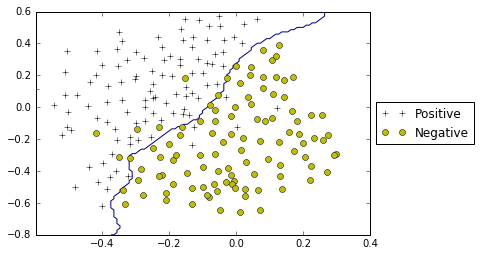

In [79]:
gamma=np.power(.1,-2)
gauss_svm=sklearn.svm.SVC(C=.3,kernel='rbf',gamma=gamma)
gauss_svm.fit(X,y.flatten())
plot_data()
plot_boundary(-.5,.4,-.8,.6,gauss_svm)

## 2 Spam Classification
Training a classifier to classify whether a given email, x, is spam. y=1 is spam, y=0 is not spam.

In [81]:
spamTest=scipy.io.loadmat('hws\machine-learning-ex6\ex6\spamTest.mat')
spamTrain=scipy.io.loadmat('hws\machine-learning-ex6\ex6\spamTrain.mat')
spamTrain.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [91]:
Xtest=spamTest['Xtest']
ytest=spamTest['ytest']
X=spamTrain['X']
y=spamTrain['y']
spam_svc=sklearn.svm.SVC()
spam_svc.fit(X,y.flatten())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
spam_svc.score(Xtest,ytest.flatten())

0.95299999999999996